## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].unique()
total_mice = len(mice_count)
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_mice = combined_df.groupby("Mouse ID")
grouped_mice.count()
mice_timepoints_count = pd.DataFrame(grouped_mice[["Mouse ID","Timepoint"]].count())
mice_timepoints_count


,Mouse ID,Timepoint
Mouse ID,,
a203,10,10
a251,10,10
a262,10,10
a275,10,10
a366,7,7
...,...,...
z435,3,3
z578,10,10
z581,10,10


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
grouped_mice.count()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [8]:
grouped_regimen = combined_df.groupby("Drug Regimen")
grouped_regimen.count().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [9]:
mean_regimen = pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].mean())
med_regimen = grouped_regimen["Tumor Volume (mm3)"].median()
var_regimen = grouped_regimen["Tumor Volume (mm3)"].var()
sdev_regimen = grouped_regimen["Tumor Volume (mm3)"].std()
sem_regimen = grouped_regimen["Tumor Volume (mm3)"].sem()

In [10]:
regimen_summ1 = mean_regimen.merge(med_regimen, left_index=True, right_index=True)
regimen_summ1 = regimen_summ1.merge(var_regimen, left_index=True, right_index=True)
regimen_summ2 = regimen_summ1.merge(sdev_regimen, left_index=True, right_index=True)
regimen_summary = regimen_summ2.merge(sem_regimen, left_index=True, right_index=True)
regimen_summary.columns = ["TumorVolume_Mean", "TumorVolume_Median", "TumorVolume_Variance", "TumorVolume_StandardDeviation", "TumorVolume_SEM"]
regimen_summary 

,TumorVolume_Mean,TumorVolume_Median,TumorVolume_Variance,TumorVolume_StandardDeviation,TumorVolume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimensummary = grouped_regimen.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
regimensummary

# This method produces everything in a single groupby function

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
mice_treated_time = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 
mice_treated_time


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

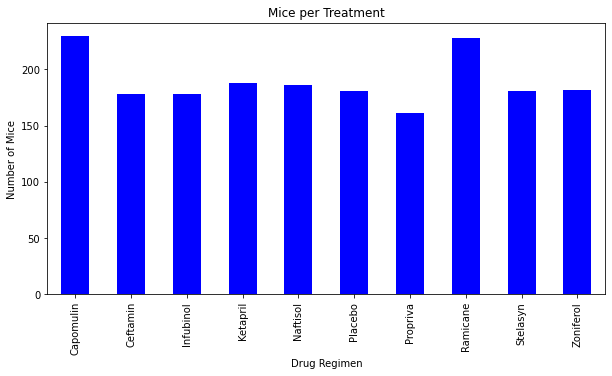

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treated_time.plot(kind="bar", color='b', figsize=(10,5))

#set chart title
plt.title("Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

#show chart and set layout
plt.show()


In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [15]:
mice = grouped_regimen["Mouse ID"].count()
x_axis = np.arange(len(mice))
drugs = ["Capomulin", "Ceftamin ", "Infubinol", "Ketapril ", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]


Text(0, 0.5, 'Number of Mice')

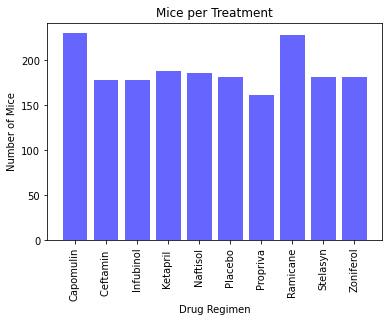

In [16]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.bar(x_axis, mice, color='b', alpha=0.6, align="center")
plt.title("Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_genders = mouse_metadata.groupby("Sex").count()
mice_genders = grouped_genders["Mouse ID"]
mice_genders

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

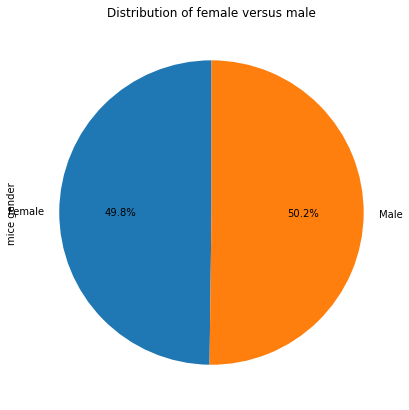

In [18]:
mice_genders.plot(kind="pie", figsize=(10,7), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of female versus male')
plt.ylabel('mice gender')
plt.show()

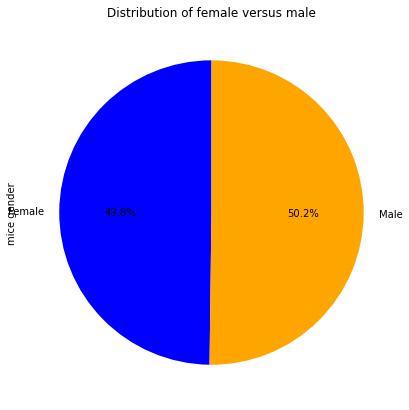

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue","orange"]
pyplot_pie = mice_genders.plot.pie(y='sizes', figsize=(10, 7), colors=colors, autopct="%1.1f%%", startangle=90)
plt.title('Distribution of female versus male')
plt.ylabel('mice gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
